<a href="https://colab.research.google.com/github/ogunjosam/ISIMIP_data/blob/main/OOO_widespread_longtrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Widespread rainfall

In this paper, widespread precipitation (1mm, 5mm, 10mm) over West Africa will be analyzed on the long term.

In [ ]:
!pip install xarray[complete]


import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns


!mkdir Data  # create a directory to store processed data

     |████████████████████████████████| 19.3 MB 538 kB/s 
     |████████████████████████████████| 136 kB 87.1 MB/s 
     |████████████████████████████████| 2.3 MB 43.5 MB/s 
     |████████████████████████████████| 153 kB 96.1 MB/s 
     |████████████████████████████████| 45 kB 4.1 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 837 kB 63.0 MB/s 
     |████████████████████████████████| 830 kB 58.9 MB/s 
     |████████████████████████████████| 822 kB 60.9 MB/s 
     |████████████████████████████████| 802 kB 57.3 MB/s 
     |████████████████████████████████| 802 kB 60.4 MB/s 
     |████████████████████████████████| 793 kB 68.3 MB/s 
     |████████████████████████████████| 793 kB 61.7 MB/s 
     |████████████████████████████████| 791 kB 71.6 MB/s 
     |████████████████████████████████| 786 kB 70.7 MB/s 
     |████████████████████████████████| 779 kB 68.1 MB/s 
     |████████████████████████████████| 778 kB 67.2 MB/s 
     |████████████

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


Download the data

In [ ]:
for yr in range(1901,2000,10):

  url  = f'http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_{yr}_{yr+9}.nc'
  print(url)

  savename = url.split('/')[-1]

  urllib.request.urlretrieve(url, savename)

  data = xr.open_dataset(savename)

  ds_sel = data.isel(lon=(data.lon >= -18) & (data.lon <= 20),
                lat=(data.lat >= 0) & (data.lat <= 15),
                )
  ds_sel.to_netcdf(path="./Data/"+savename)


http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_1901_1910.nc
http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_1911_1920.nc
http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_1921_1930.nc
http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_1931_1940.nc
http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_1941_1950.nc
http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20180927/pr_gswp3_1951_1960.nc
http://esg.pik-potsdam.de/thredds/fileServer/isimip_dataroot/isimip2a/input/clim_atm_obs/GSWP3/historical/pr/daily/v20

Let's extract the data and estimate the widesprad precipitation

Streaming output truncated to the last 5000 lines.
['25-04-1937', 44.035, 24.474, 9.079]
['26-04-1937', 36.886, 11.447, 2.325]
['27-04-1937', 42.807, 20.175, 6.404]
['28-04-1937', 51.711, 33.026, 12.807]
['29-04-1937', 39.605, 16.623, 2.851]
['30-04-1937', 51.754, 25.833, 9.825]
['01-05-1937', 55.307, 33.202, 10.0]
['02-05-1937', 40.395, 8.728, 2.632]
['03-05-1937', 45.132, 21.623, 6.272]
['04-05-1937', 50.658, 23.684, 3.07]
['05-05-1937', 44.342, 21.754, 5.219]
['06-05-1937', 31.711, 9.825, 0.614]
['07-05-1937', 35.614, 9.167, 0.702]
['08-05-1937', 44.781, 18.114, 4.386]
['09-05-1937', 53.421, 23.772, 9.43]
['10-05-1937', 62.193, 39.474, 20.526]
['11-05-1937', 56.096, 34.254, 19.518]
['12-05-1937', 61.667, 32.368, 14.781]
['13-05-1937', 52.632, 33.246, 22.763]
['14-05-1937', 47.105, 29.079, 19.737]
['15-05-1937', 43.596, 25.0, 15.658]
['16-05-1937', 52.588, 36.272, 24.868]
['17-05-1937', 52.325, 33.421, 18.421]
['18-05-1937', 52.807, 29.079, 12.368]
['19-05-1937', 59.254, 30.482, 14.7

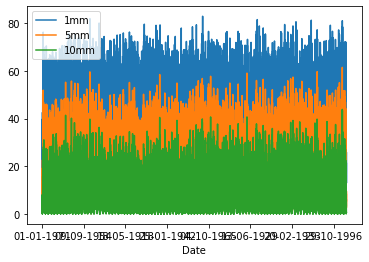

In [ ]:
from netCDF4 import Dataset
import netCDF4

files = glob.glob(f'./Data/*.nc')

vx = []
for i,ii in enumerate(files):

  nc_fid = Dataset(ii, 'r')
  lat = nc_fid.variables['lat'][:].data
  lon = nc_fid.variables['lon'][:].data
  dtime = netCDF4.num2date(nc_fid.variables['time'][:].data,
             nc_fid.variables['time'].units)
  str_time = [i.strftime("%d-%m-%Y") for i in dtime]
  dd = nc_fid.variables['pr'][:].data
  dd = dd*86400

  
  cc = dd.shape[1]*dd.shape[2]

  for j, ji in enumerate(str_time):
    xy = dd[j,:,:]
    v1 = (np.count_nonzero(xy[:,:] >= 1)/cc)*100
    v5 = (np.count_nonzero(xy[:,:] >= 5)/cc)*100
    v10 = (np.count_nonzero(xy[:,:] >= 10)/cc)*100
    vx.append([ji,np.round(v1,2),np.round(v5,2),np.round(v10,2)])
    print([ji,np.round(v1,3),np.round(v5,3),np.round(v10,3)])



vy = pd.DataFrame(vx,columns=['Date','1mm','5mm','10mm'])
vy = vy.set_index('Date')
vy.to_excel('widespread.xlsx')

vy.plot()

Let try the annual analysis

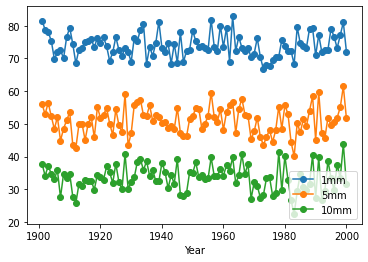

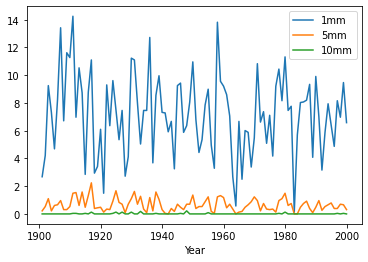

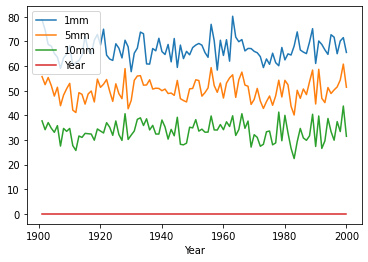

In [ ]:
vy.index = pd.DatetimeIndex(vy.index)
vy['Year'] = vy.index.year

vy_max = vy.groupby('Year').max()
vy_max.plot(marker='o')

vy_min = vy.groupby('Year').min()
vy_min.plot()

vy_range = vy.groupby('Year').apply(lambda g: g.max() - g.min())
vy_range.plot()

Periodicity

250.0

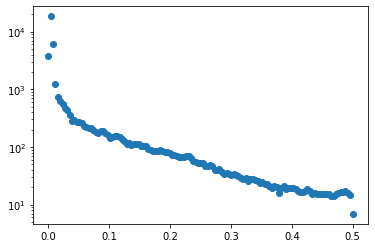

In [ ]:
from scipy import stats, signal
fig, axes = plt.subplots()

f,pxx = signal.welch(vy['1mm'])

#plt.plot(pxx)
axes.semilogy(f,np.squeeze(pxx),'o')
#axes.set_xlim([0,0.01])

1/0.004

How does the data look on a monthly basis

[64.         19.69230769 12.19047619  7.75757576  5.81818182  4.
  3.01176471]
[128.          21.33333333  12.19047619   7.75757576   5.95348837
   4.74074074   4.           3.01176471]
[256.          42.66666667  12.19047619   5.95348837   4.        ]


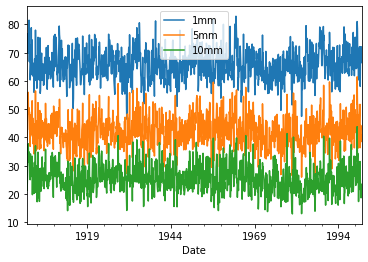

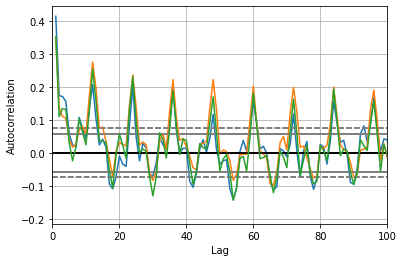

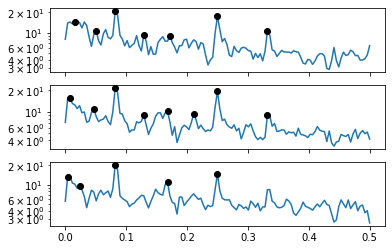

In [ ]:
vy_monthly = vy.resample('M').max()
vy_monthly = vy_monthly.drop(columns='Year')
vy_monthly.plot()

vy_monthly.to_excel('widespread_monthly.xlsx')

fig, axes = plt.subplots()
pd.plotting.autocorrelation_plot(vy_monthly["1mm"],ax=axes)
pd.plotting.autocorrelation_plot(vy_monthly["10mm"],ax=axes)
pd.plotting.autocorrelation_plot(vy_monthly["5mm"],ax=axes)
axes.set_xlim([0,100])


fig, axe = plt.subplots(3,1,sharex=True)

for k, kk in enumerate(list(vy_monthly)):
  f,pxx = signal.welch(vy_monthly[kk])
  axe[k].semilogy(f,np.sqrt(pxx))
  a,_ = signal.find_peaks(pxx,height=80,distance=5)
  axe[k].semilogy(f[a],np.sqrt(pxx[a]),'ko')

  print(1/f[a])
